In [6]:
import os
os.getcwd()

'/Users/adebayojj/Desktop/GitHubProjects/kpi-dashboard-africa-smb/notebooks'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [10]:
df = pd.read_csv("../data/financial_data.csv")
df.head()

,Unnamed: 0,Month,Revenue,Expenses,New_Customers,Churned_Customers,Existing_Customers,Profit,Total_Customers,CAC,Revenue_per_Customer,LTV,Churn Rate (%)
0,0,2023-01-01T00:00:00.000,10000,7000,50,10,100,3000,150,140.000000,66.666667,800.000000,6.666667
1,1,2023-02-01T00:00:00.000,12000,7500,60,12,140,4500,200,125.000000,60.000000,720.000000,6.000000
2,2,2023-03-01T00:00:00.000,15000,8000,70,15,188,7000,258,114.285714,58.139535,697.674419,5.813953
3,3,2023-04-01T00:00:00.000,17000,8500,80,17,243,8500,323,106.250000,52.631579,631.578947,5.263158
4,4,2023-05-01T00:00:00.000,20000,9000,90,20,306,11000,396,100.000000,50.505051,606.060606,5.050505


In [12]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df['Profit'] = df['Revenue'] - df['Expenses']
df[['Month', 'Revenue', 'Expenses', 'Profit']].head()

,Month,Revenue,Expenses,Profit
0,2023-01-01,10000,7000,3000
1,2023-02-01,12000,7500,4500
2,2023-03-01,15000,8000,7000
3,2023-04-01,17000,8500,8500
4,2023-05-01,20000,9000,11000


In [16]:
df['Total_Customers'] = df['New_Customers'] + df['Existing_Customers']
df[['Month', 'Total_Customers']].head()

,Month,Total_Customers
0,2023-01-01,150
1,2023-02-01,200
2,2023-03-01,258
3,2023-04-01,323
4,2023-05-01,396


In [18]:
df['CAC'] = df['Expenses'] / df['New_Customers'].replace(0, pd.NA)
df[['Month', 'CAC']].head()

,Month,CAC
0,2023-01-01,140.000000
1,2023-02-01,125.000000
2,2023-03-01,114.285714
3,2023-04-01,106.250000
4,2023-05-01,100.000000


In [20]:
df['Revenue_per_Customer'] = df['Revenue'] / df['Total_Customers'].replace(0, pd.NA)
df[['Month', 'Revenue_per_Customer']].head()

,Month,Revenue_per_Customer
0,2023-01-01,66.666667
1,2023-02-01,60.000000
2,2023-03-01,58.139535
3,2023-04-01,52.631579
4,2023-05-01,50.505051


In [22]:
df['LTV'] = df['Revenue_per_Customer'] * 12
df[['Month', 'LTV']].head()

,Month,LTV
0,2023-01-01,800.000000
1,2023-02-01,720.000000
2,2023-03-01,697.674419
3,2023-04-01,631.578947
4,2023-05-01,606.060606


In [24]:
df['Churn Rate (%)'] = (df['Churned_Customers'] / df['Total_Customers'].replace(0, pd.NA)) * 100
df[['Month', 'Churn Rate (%)']].head()

,Month,Churn Rate (%)
0,2023-01-01,6.666667
1,2023-02-01,6.000000
2,2023-03-01,5.813953
3,2023-04-01,5.263158
4,2023-05-01,5.050505


In [42]:
kpi_cols = ['Month', 'Revenue', 'Expenses', 'Profit', 'Total_Customers', 'CAC',
            'LTV', 'Churn Rate (%)']

df[kpi_cols].head()

,Month,Revenue,Expenses,Profit,Total_Customers,CAC,LTV,Churn Rate (%)
0,2023-01-01,10000,7000,3000,150,140.000000,800.000000,6.666667
1,2023-02-01,12000,7500,4500,200,125.000000,720.000000,6.000000
2,2023-03-01,15000,8000,7000,258,114.285714,697.674419,5.813953
3,2023-04-01,17000,8500,8500,323,106.250000,631.578947,5.263158
4,2023-05-01,20000,9000,11000,396,100.000000,606.060606,5.050505


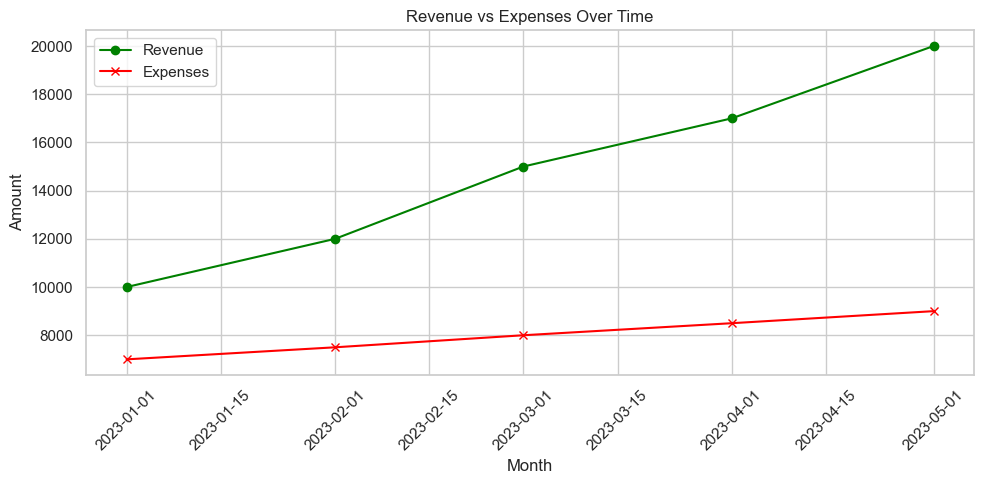

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Revenue'], label='Revenue', marker='o', color='green')
plt.plot(df['Month'], df['Expenses'], label='Expenses', marker='x', color='red')
plt.title("Revenue vs Expenses Over Time")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

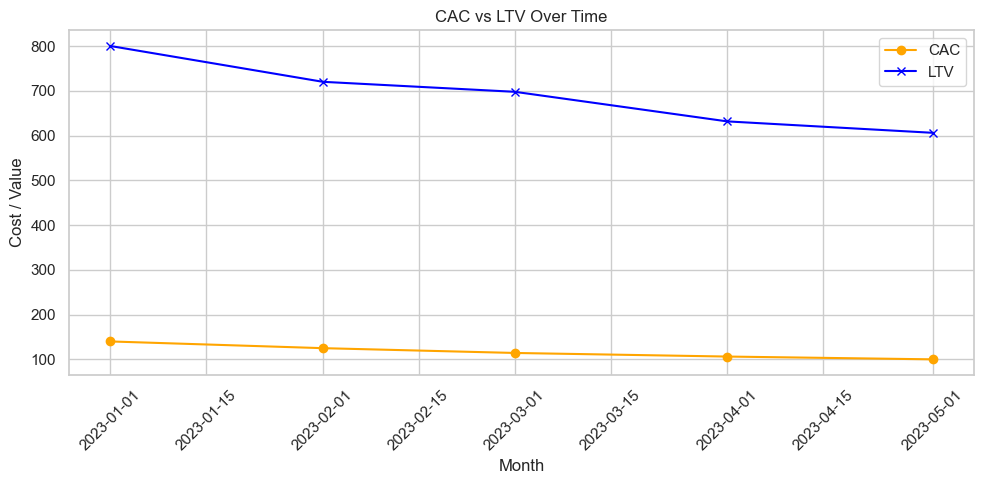

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['CAC'], label='CAC', marker='o', color='orange')
plt.plot(df['Month'], df['LTV'], label='LTV', marker='x', color='blue')
plt.title("CAC vs LTV Over Time")
plt.xlabel("Month")
plt.ylabel("Cost / Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

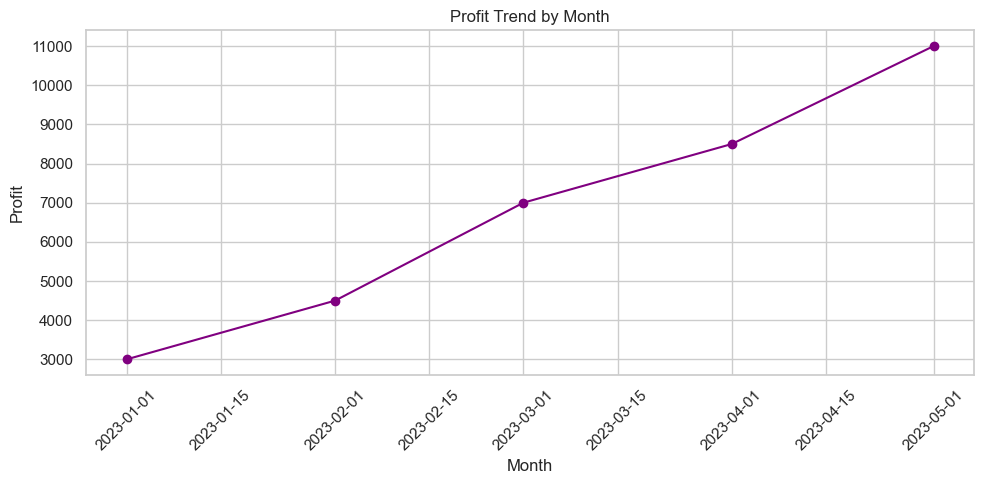

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Profit'], marker='o', color='purple')
plt.title("Profit Trend by Month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

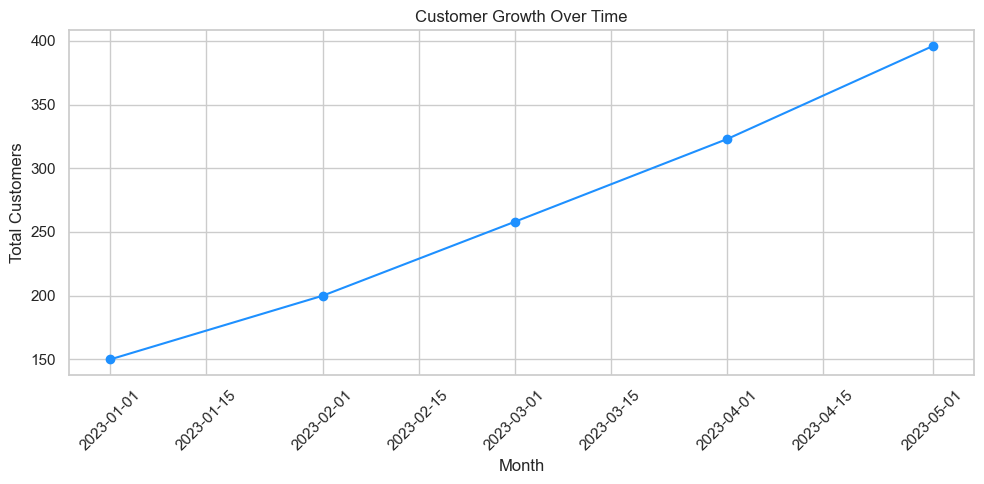

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Total_Customers'], marker='o', color='dodgerblue')
plt.title("Customer Growth Over Time")
plt.xlabel("Month")
plt.ylabel("Total Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

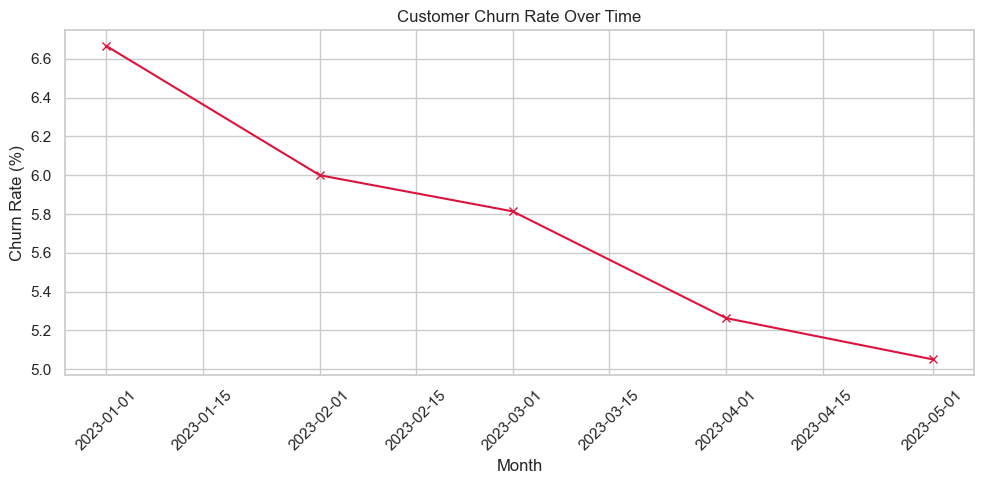

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Churn Rate (%)'], marker='x', color='crimson')
plt.title("Customer Churn Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()